In [1]:
# Para ocultar los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_excel('4 factors.xlsx')
df

,A,B,C,D,Respuesta
0,-1,-1,-1,-1,550
1,1,-1,-1,-1,669
2,-1,1,-1,-1,604
3,1,1,-1,-1,650
4,-1,-1,1,-1,633
5,1,-1,1,-1,642
6,-1,1,1,-1,601
7,1,1,1,-1,635
8,-1,-1,-1,1,1037
9,1,-1,-1,1,749


### Esto es un diseño $2^4$

In [4]:
re = smf.ols('Respuesta ~ A*B*C*D', data=df).fit()
re.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Respuesta   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 14 Dec 2017   Prob (F-statistic):                nan
Time:                        13:26:04   Log-Likelihood:                 429.78
No. Observations:                  16   AIC:                            -827.6
Df Residuals:                       0   BIC:                            -815.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    776.0625        inf          0        nan         nan         nan
A            -50.8125        inf         -0        nan         nan         nan
B             -0.8125        inf         -0        nan         nan         nan
A:B           -3.9375        inf         -0        nan         nan         nan
C              3.6875        inf          0        nan         nan         nan
A:C          -12.4375        inf         -0        nan         nan         nan
B:C          -21.9375        inf         -0        nan         nan         nan
A:B:C         -7.8125        inf         -0        nan         nan         nan
D            153.0625        inf          0        nan         nan         nan
A:D          -76.8125        inf         -0        nan         nan         nan
B:D           -0.3125        inf         -0        nan         nan         nan
A:B:D          2.0625        inf          0        nan         nan         nan
C:D           -1.0625        inf         -0        nan         nan         nan
A:C:D          2.8125        inf          0        nan         nan         nan
B:C:D        -12.6875        inf         -0        nan         nan         nan
A:B:C:D      -20.0625        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                        0.781   Durbin-Watson:                   0.633
Prob(Omnibus):                  0.677   Jarque-Bera (JB):                0.655
Skew:                           0.431   Prob(JB):                        0.721
Kurtosis:                       2.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

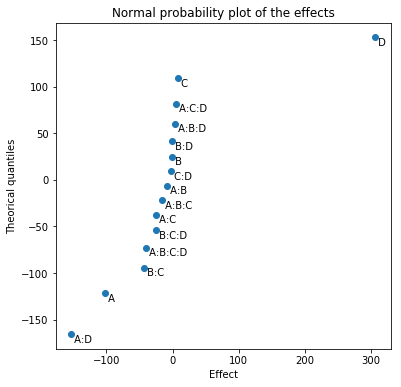

In [5]:
effects = [v*2 for v in re.params[1:]]
labels = [v for v in re.params[1:].index]

rv = st.norm(loc=np.mean(effects),scale=np.std(effects))

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
(_y, _x), _ = st.probplot(effects,dist=rv)
ax.scatter(_x,_y)

for i, (e, l) in enumerate(sorted(zip(effects,labels),key=lambda v:v[0])):
    ax.text(_x[i],_y[i], ' '+l, verticalalignment='top')

ax.set_ylabel('Theorical quantiles')
ax.set_xlabel('Effect')
ax.set_title('Normal probability plot of the effects')

plt.show()

In [6]:
re = smf.ols('Respuesta ~ (A+B+C+D)**3', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.5625,6.414621,0.239398
B,1.0,10.5625,10.5625,0.001640,0.974232
C,1.0,217.5625,217.5625,0.033783,0.884280
D,1.0,374850.0625,374850.0625,58.205967,0.082971
A:B,1.0,248.0625,248.0625,0.038519,0.876624
A:C,1.0,2475.0625,2475.0625,0.384323,0.646707
A:D,1.0,94402.5625,94402.5625,14.658641,0.162644
B:C,1.0,7700.0625,7700.0625,1.195650,0.471598
B:D,1.0,1.5625,1.5625,0.000243,0.990085
C:D,1.0,18.0625,18.0625,0.002805,0.966316


In [7]:
re = smf.ols('Respuesta ~ (A+B+C+D)**2', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.5625,20.276491,0.006382
B,1.0,10.5625,10.5625,0.005184,0.945391
C,1.0,217.5625,217.5625,0.106786,0.757069
D,1.0,374850.0625,374850.0625,183.987907,0.000039
A:B,1.0,248.0625,248.0625,0.121757,0.741351
A:C,1.0,2475.0625,2475.0625,1.214837,0.320582
A:D,1.0,94402.5625,94402.5625,46.335673,0.001042
B:C,1.0,7700.0625,7700.0625,3.779427,0.109498
B:D,1.0,1.5625,1.5625,0.000767,0.978978
C:D,1.0,18.0625,18.0625,0.008866,0.928641


In [8]:
re = smf.ols('Respuesta ~ (A+B+C+D)**2 - B:D - C:D - A:B - A:C - B - C', data=df).fit()
anova_lm(re)

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,41310.5625,41310.562500,34.536174,1.066571e-04
D,1.0,374850.0625,374850.062500,313.379588,1.970505e-09
A:D,1.0,94402.5625,94402.562500,78.921785,2.379952e-06
B:C,1.0,7700.0625,7700.062500,6.437354,2.761756e-02
Residual,11.0,13157.6875,1196.153409,NaN,NaN
